In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

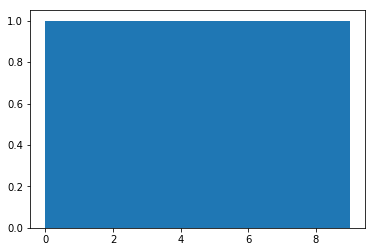

In [2]:
plt.hist(np.arange(10))
plt.show()

In [3]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from root_numpy import hist2array

Welcome to JupyROOT 6.20/02


In [37]:
#regions = ['sr', 'sb', 'sblo', 'sbhi']
regions = ['sr']
pt = {}
#Run2017B-F_region_sblo_blind_None_selected_phoEt_list.txt
for r in regions:
    in_files = glob.glob('Templates/Run2017B-F_region_%s_blind_None_selected_phoEt_list.txt'%r)
    print(in_files)
    
    pt[r] = []
    for in_file in in_files:
        f = open(in_file, "r")
        for i,l in enumerate(f):
            pt0_, pt1_ = l.replace('\n','').split(':')
            pt[r].append([float(pt0_), float(pt1_)])
            #if i > 10000: break

    pt[r] = np.array(pt[r])
    print(pt[r][:5])
    print(len(pt[r]))

['Templates/Run2017B-F_region_sr_blind_None_selected_phoEt_list.txt']
[[82.115845 44.247128]
 [75.725586 50.391171]
 [67.75985  29.983433]
 [47.604828 31.643906]
 [73.852661 48.185333]]
167218


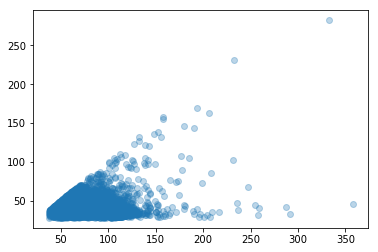

In [5]:
px = pt['sr'][:,0]
py = pt['sr'][:,1]
plt.scatter(px, py, alpha=0.3)
plt.show()

In [6]:
px = px-np.mean(px)
py = py-np.mean(py)
data = np.array([px,py])

In [7]:
print(np.cov(data))

[[430.59901741  13.72414234]
 [ 13.72414234 108.45753271]]


In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data.T)
print(pca.components_.T)

[[ 0.999097  -0.0424874]
 [ 0.0424874  0.999097 ]]


In [9]:
print(pca.explained_variance_)
print(np.sqrt(pca.explained_variance_))

[431.18264749 107.87390264]
[20.76493794 10.38623621]


In [16]:
def smear(ma, offset, sigma, sigma_frac=None):
    '''if sigma_frac is None:
        gauss = np.random.normal(mu, sigma, size=len(ma))
        ma_smeared = [m*g for m, g in zip(ma, gauss)]
    else:'''
    if sigma_frac is None:
        ma_smeared = [np.random.normal(m+offset, sigma) for m in ma]
    else:
        ma_smeared = [np.random.normal(m+offset, sigma_frac*m) for m in ma]
    return ma_smeared

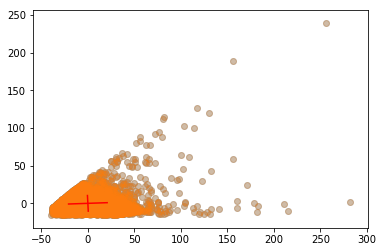

In [30]:
plt.scatter(px, py, alpha=0.3)
#x_comp, y_comp = [], []
for i in range(2):
    eigenvalue = np.sqrt(pca.explained_variance_[i]) 
    eigenvalue_arr = np.array([[-eigenvalue, eigenvalue]])
    eigenvector = np.array([pca.components_[i]]).T
    x_comp, y_comp = np.dot(eigenvector, eigenvalue_arr)
    plt.plot(x_comp, y_comp, color='red')
px_ = px.copy()
py_ = py.copy()
#px_ = np.convolve(px_, px_+20., 'same')
#px_ = smear(px_, offset=20., sigma=5.)
#py_ = smear(py_, offset=10., sigma=1.)
plt.scatter(px_, py_, alpha=0.3)
plt.show()

In [31]:
wd, ht = int(440*1), int(400*1)

pt_bins_ = {}
dPt = 1
pt_bins_[0] = np.arange(25,225+dPt,dPt)
'''
pt_bins_[0] = np.arange(25,100,dPt)
dPt = 5
pt_bins_[1] = np.arange(100,120,dPt)
dPt = 20
pt_bins_[2] = np.arange(120,200,dPt)
#dPt = 750-200
#pt_bins_[3] = np.arange(200,750+dPt,dPt)
'''
pt_bins = np.concatenate([pt_bin_ for pt_bin_ in pt_bins_.values()])
n_pt_bins = len(pt_bins)-1
pt_bins = array('d', list(pt_bins))
print(n_pt_bins)

200


In [80]:
c, h = {}, {}

#regions = ['sblo']
key = 'pt0vpt1'
'''
k = key+'sr'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, n_pt_bins, pt_bins, n_pt_bins, pt_bins)

k = key+'sb'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, n_pt_bins, pt_bins, n_pt_bins, pt_bins)

k = key+'sblo'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, n_pt_bins, pt_bins, n_pt_bins, pt_bins)

k = key+'sbhi'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, n_pt_bins, pt_bins, n_pt_bins, pt_bins)
'''
regions = ['sr', 'srshift']
for r in regions:
    k = key+r
    print(r)
    #'''
    
    c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
    h[k] = ROOT.TH2F(k, k, n_pt_bins, pt_bins, n_pt_bins, pt_bins)
    #'''
    r_ = r.replace('shift','')
    for i in range(len(pt[r_])):
        if 'shift' in r:
            h[k].Fill(pt[r_][i][0]+20., pt[r_][i][1]+10.)
        else:
            h[k].Fill(pt[r_][i][0], pt[r_][i][1])

sr
srshift


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1sr
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1srshift


In [81]:
for ix in range(1, h[key+'srshift'].GetNbinsX()+1):
    for iy in range(1, h[key+'srshift'].GetNbinsY()+1):
        binc = h[key+'srshift'].GetBinContent(ix, iy)
        if binc == 0.: h[key+'srshift'].SetBinContent(ix, iy, 1.)

['pt0vpt1sr', 'pt0vpt1srshift']


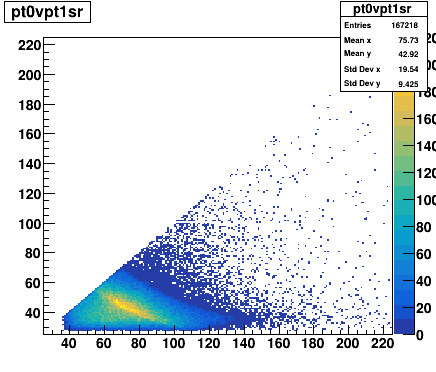

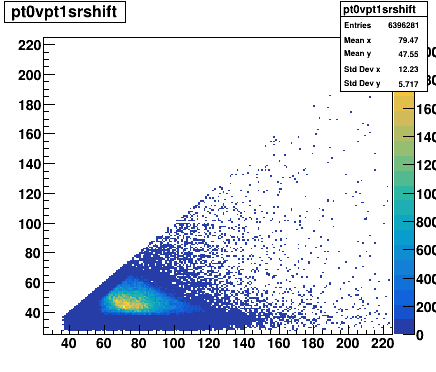

In [82]:
print(h.keys())
for r in regions:
    k = key+r
    c[k].cd()
    if 'shift' in r:
        h[k].Multiply(h[key+'sr'])
    h[k].Draw("COLZ")
    c[k].Draw()

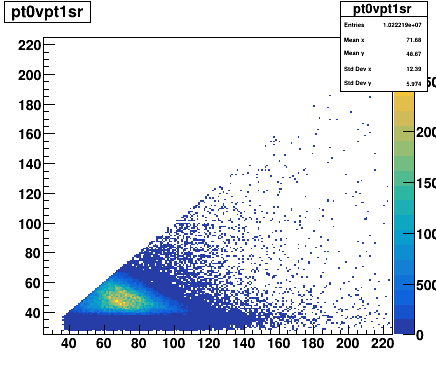

In [62]:
k = 'pt0vpt1sr'+'clone'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = h['pt0vpt1sr'].Clone()
h[k].Multiply(h['pt0vpt1srshift'])
h[k].Draw('COL Z')
c[k].Draw()

99999.9998622
100000.000185
8174.27491109


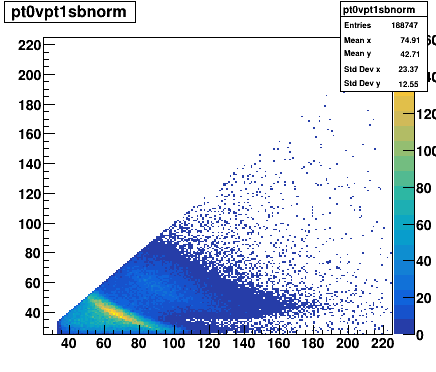

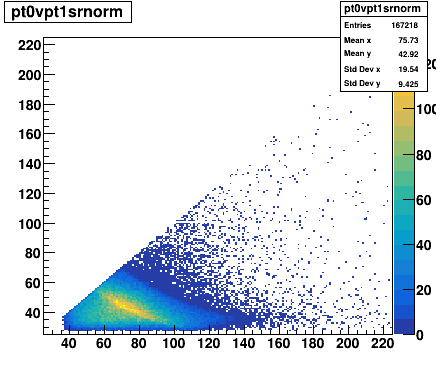

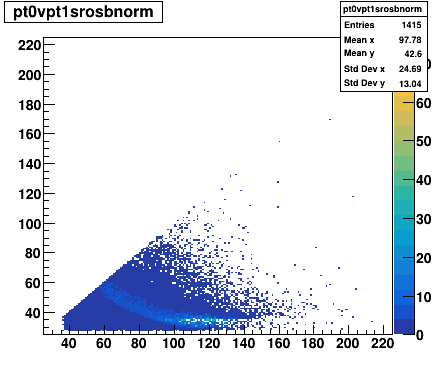

In [9]:
ks = [ksrc, ktgt, kratio]
#ks = [ksrc, ktgt]
for k in ks:
    c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
    print(h[k].Integral())
    if k == kratio:
        pass
        #h[k].SetMaximum(10.)
    h[k].Draw("COLZ")
    c[k].Draw()

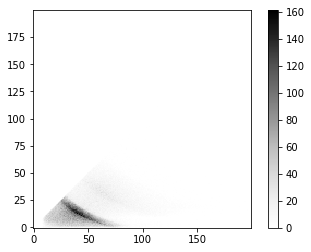

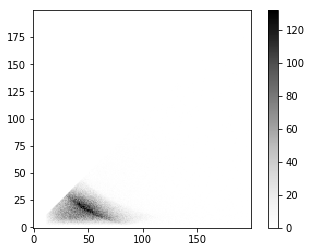

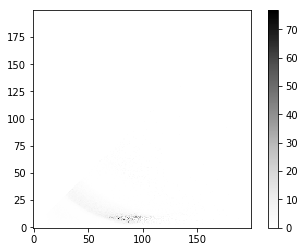

In [10]:
img = {}
for k in ks:
    ratio, pt_edges = hist2array(h[k], return_edges=True)
    ratio, pt_edges = ratio.T, pt_edges[0]
    img[k] = ratio

    plt.imshow(img[k], origin='lower', cmap='Greys')
    plt.colorbar()
    plt.show()

(200, 200)
2.5000002


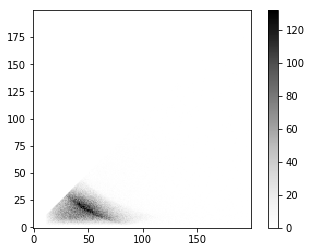

In [15]:
k = ktgt
imgshift = {}
imgshift[k] = img[k].copy()
print(imgshift[k].shape)
print(np.mean(imgshift[k]))
plt.imshow(imgshift[k], origin='lower', cmap='Greys')
plt.colorbar()
plt.show()

In [185]:
from skimage.measure import block_reduce
from skimage.transform import rescale
from numpy.lib.stride_tricks import as_strided

def upsample_arr(x, b0, b1):

    r, c = x.shape                                    # number of rows/columns
    rs, cs = x.strides                                # row/column strides
    x = as_strided(x, (r, b0, c, b1), (rs, 0, cs, 0)) # view as a larger 4D array

    return x.reshape(r*b0, c*b1)/(b0*b1)            # create new 2D array with same total occupancy 

def resample_arr(img, factor=2, func=np.sum, alias=False):
    if not alias:
        img_reduced = block_reduce(img, block_size=(factor, factor), func=func) # downsample by summing over [factor, factor] window
    else:
        img_reduced = rescale(img, 1./factor, anti_aliasing=True)
    img_resampled = upsample_arr(img_reduced, factor, factor)
    #if func == np.sum:
    #    img_resampled /= (factor*factor)
    return img_resampled


In [195]:
from collections import OrderedDict

imgr = OrderedDict()
imgm = OrderedDict()

'''
factors = [2, 4, 20]
funcs = [np.sum, np.sum, np.sum]
threshs = [1000., 1., 0.1]
for k in [kratio]:
'''
#factors = [2, 4, 5, 25]#, [2,4,5,25]
#funcs = [np.sum, np.sum, np.sum, np.sum]
#threshs = [100, 25., 5., 0.1]# [100.,25.,5.,.5]
factors = [2, 4, 5, 20, 25]
aliases = [False, False, False, True, True]
threshs = [100., 10., 2., 1., 0.1]
#factors = [2, 4, 25]
#funcs = [np.sum, np.sum]
#threshs = [10., 5., 1.]
for k in ks:
    imgm[k] = img[k].copy()
    print(img[k].shape)
    for i,factor in enumerate(factors):
        kf = k+str(factor)
        imgr[kf] = img[k].copy()
        imgr[kf] = resample_arr(imgr[kf], factor=factor, func=np.sum)
        #if i == 2: continue
        imgm[k][imgm[k] < threshs[i]] = imgr[k+str(factors[i])][imgm[k] < threshs[i]]

(200, 200)
(200, 200)
(200, 200)


['pt0vpt1sbnorm', 'pt0vpt1srnorm', 'pt0vpt1srosbnorm']
pt0vpt1srosbnorm


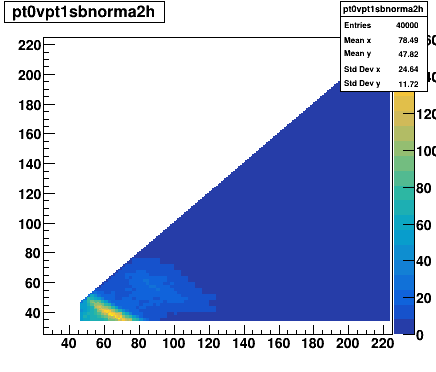

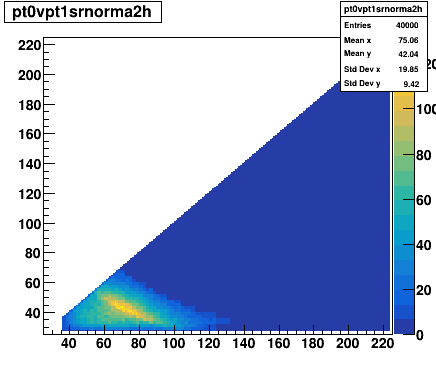

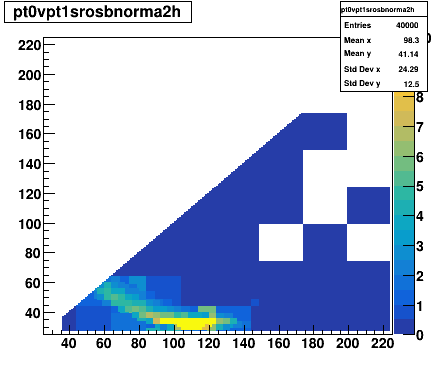

In [196]:
#for k in ks:
print(imgm.keys())
print(kratio)
for k in imgm.keys():
    kh = k+'a2h'
    c[kh] = ROOT.TCanvas("c%s"%kh, "c%s"%kh, wd, ht)
    h[kh] = ROOT.TH2F(kh, kh, n_pt_bins, pt_bins, n_pt_bins, pt_bins)
    ib = 0
    for ix in range(1, h[kh].GetNbinsX()+1):
        for iy in range(1, h[kh].GetNbinsY()+1):
            binc = imgm[k][iy-1,ix-1]
            if iy > ix:
                binc = 0.
            if k == ksrc:
                mlead_low = h[kh].GetXaxis().GetBinLowEdge(ix)
                msublead_low = h[kh].GetYaxis().GetBinLowEdge(iy)
                if mlead_low < 140./3.: binc = 0.
                if msublead_low < 140./4.: binc = 0.
            if k == ktgt or k == kratio:
                #if ib == print(h[kh].GetXaxis().GetBinLowEdge(ix))
                mlead_low = h[kh].GetXaxis().GetBinLowEdge(ix)
                msublead_low = h[kh].GetYaxis().GetBinLowEdge(iy)
                if mlead_low < 110./3.: binc = 0.
                if msublead_low < 110./4.: binc = 0.
            if k == kratio:
                pass
                h[kh].SetMaximum(10.)
            h[kh].SetBinContent(ix-1, iy-1, binc)
            ib += 1
    #h[kh].SetMaximum(10.)
    h[kratio].SetContour(100)
    h[kh].Draw("COLZ")
    c[kh].Draw()

19154.6541633


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cpt0vpt1srosbnorma2hresample


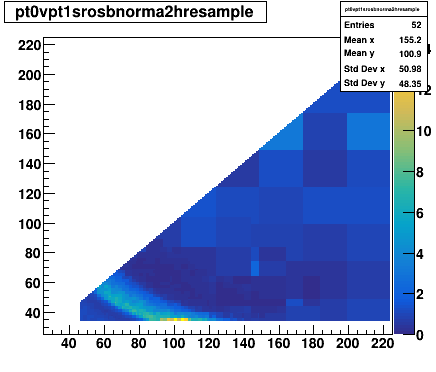

In [198]:
ksrc = key+src+'norma2h'+'resample'
ktgt = key+tgt+'norma2h'+'resample'
kratio = key+tgt+'o'+src+'norma2h'+'resample'

h[ktgt] = h[key+tgt+'norma2h'].Clone()
h[ktgt].SetName(ktgt)
h[ktgt].SetTitle(ktgt)
h[ksrc] = h[key+src+'norma2h'].Clone()
h[ksrc].SetName(ksrc)
h[ksrc].SetTitle(ksrc)

h[ktgt].Scale(1.e5/h[key+tgt].Integral())
h[ksrc].Scale(1.e5/h[key+src].Integral())

h[kratio] = h[ktgt].Clone()
h[kratio].SetName(kratio)
h[kratio].SetTitle(kratio)
h[kratio].Divide(h[ksrc])

c[kratio] = ROOT.TCanvas("c%s"%kratio,"c%s"%kratio,wd,ht)
print(h[kratio].Integral())
#h[kratio].SetMaximum(10.)
h[kratio].SetContour(100)
h[kratio].Draw("COLZ")
c[kratio].Draw()

# hist2array().T origin @ lower left + (row, col) <=> (iy, ix)
# NOTE: hist2array() drops uflow and ovflow bins => idx -> idx-1
# row:sublead, col:lead
ratio, pt_edges = hist2array(h[kratio], return_edges=True)
ratio, pt_edges = ratio.T, pt_edges[0]

In [201]:
# Remove unphysical values
#ratio[ratio==0.] = 0.
ratio[np.isnan(ratio)] = 1.
print('pt-ratio:')
print(ratio.min(), ratio.max(), np.mean(ratio), np.std(ratio))

# Write out weights to numpy file
#Run2017B-F_sb2sr_blind_None_ptwgts.npz
np.savez("%s/%s_%s2%s_resample_blind_%s_ptwgts.npz"%('Weights', 'Run2017B-F', 'sb', 'sr', None), pt_edges=pt_edges, pt_wgts=ratio)

pt-ratio:
0.0 14.557748 0.47886637 0.9083112
